# image alignment tests


In [1]:
import cv2
import os
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import napari


from align import *

In [2]:
folder='E:/2020_11_18 C3S 28d+EDX (2 Teile)/2020_11_19 C3S 28d+EDX/Images/SEM Image/'
folder='E:/2020_11_18 C3S 28d+EDX (2 Teile)/2020_11_19 C3S 28d+EDX/Images/EDS/'
folder='F:/2020_11_18 C3S 28d+EDX (2 Teile)/2020_11_19 C3S 28d+EDX/EDS Export/Images/'
#folder='E:/SEM Image/'
folder='F:/2020_11_19 C3S 28d+EDX/EDS Export/Images/'

identified 14 elements
F:/2020_11_19 C3S 28d+EDX/EDS Export/Images\


In [3]:
translation_a, error_list, filled_canvas, loaded_images = process_translation_of_folder(folder=folder, multicore=True, do_nlm=False, mask_size=0.99, eq_hist=True, crop_thresh=10 )

im_cnt = len(loaded_images)
x_scale=10*1000/434
z_scale=192
scale=(z_scale, x_scale/math.cos(38), x_scale)
print(scale)

loading 80 images...
Found existing translation csv, loading...
Create 3D image stack with corrected image translation
  - allocating 3D image space..
  - translating and denoising images..
0 0.0 0.0
35 : 739 192 : 1216
1 -0.47830180935235544 4.067176514097436
34 : 738 196 : 1220
2 4.108816884847206 12.921720707898466
39 : 743 205 : 1229
3 4.682022936568197 16.101096837791662
39 : 743 208 : 1232
4 4.8912111190774565 19.110677310770594
39 : 743 211 : 1235
5 4.880503680417479 21.34416996331106
39 : 743 213 : 1237
6 5.274080957109546 22.79725222349909
40 : 744 215 : 1239
7 4.985588289339731 25.070647726027808
40 : 744 217 : 1241
8 9.794687684348688 26.246212149441
44 : 748 218 : 1242
9 10.373525880780909 27.83348350053457
45 : 749 220 : 1244
10 10.057575427304249 29.037732774991007
45 : 749 221 : 1245
11 9.486180291244846 30.33023082445885
44 : 748 222 : 1246
12 9.078531926769134 30.70266645395503
44 : 748 222 : 1246
13 14.228329480994132 34.030440398731685
49 : 753 226 : 1250
14 11.86041

# add a shape and mark the top line of the cube

In [4]:
translation   = translation_a.copy()
z_slice_count = filled_canvas.shape[0]

### correction of the y-translation

In [5]:
translation_csv = folder + os.sep + 'translations_fixed_y.csv'
fixed_translation = load_translation_csv( translation_csv, im_cnt )
if len(fixed_translation) != im_cnt-1:
    with napari.gui_qt():
        viewer = napari.view_image(filled_canvas, name='select y correction line') # scale=scale

    correction_dict = {}
    for point in viewer.layers[1].data[0]:
        correction_dict[math.floor(point[0])] = point[1]

    y_correction_list = get_axis_correction_list( correction_dict, z_slice_count )

    for i, y in enumerate(y_correction_list):
        # print(i, y, translation[i-1][1], translation[i-1][1] - y)
        if i>0: translation[i-1][1] -= y
    save_translation_csv( translation, translation_csv)
else:
    translation = fixed_translation

Found existing translation csv, loading...


### correction of the x-translation

In [6]:
translation_csv = folder + os.sep + 'translations_fixed_xy.csv'
fixed_translation = load_translation_csv( translation_csv, im_cnt )
if len(fixed_translation) != im_cnt-1:
    corrected_images = create_3D_stack(translation, loaded_images, False)
    with napari.gui_qt():
        viewer = napari.view_image(corrected_images, name='select x correction line')
        viewer.scale_bar.visible = True

    correction_dict = {}
    for point in viewer.layers[1].data[0]:
        correction_dict[math.floor(point[0])] = point[0]

    x_correction_list = get_axis_correction_list( correction_dict, z_slice_count )

    for i, x in enumerate(x_correction_list):
        # print(i, y, translation[i-1][2], translation[i-1][2] - x)
        if i>0: translation[i-1][2] += x
    save_translation_csv( translation, translation_csv)
else:
    translation = fixed_translation

Found existing translation csv, loading...


In [7]:
corrected_images = create_3D_stack(translation, loaded_images, False)
with napari.gui_qt():
    viewer = napari.view_image(corrected_images, name='test2', scale=scale)
    viewer.scale_bar.visible = True
    

Create 3D image stack with corrected image translation
  - allocating 3D image space..
  - translating and denoising images..
0 0.0 0.0
24 : 728 132 : 1156
1 -0.2663578969338434 5.526807071645519
24 : 728 138 : 1162
2 4.53270470968423 15.840981822994632
29 : 733 148 : 1172
3 5.317854673823733 20.47998851043591
29 : 733 153 : 1177
4 5.738986768751505 24.949199540962923
30 : 734 157 : 1181
5 5.940223242510039 28.64232275105147
30 : 734 161 : 1185
6 6.545744431620618 31.555035568787584
31 : 735 164 : 1188
7 6.469195676269315 35.288061628864384
31 : 735 168 : 1192
8 11.490238983696784 37.92325660982566
36 : 740 170 : 1194
9 12.281021092547517 40.43072983415606
36 : 740 173 : 1197
10 12.17701455148937 42.55518098184933
36 : 740 175 : 1199
11 11.817563327848479 44.76788090455401
36 : 740 177 : 1201
12 11.621858875791279 46.06051840728702
36 : 740 178 : 1202
13 18.49214230729598 50.530611918840435
43 : 747 183 : 1207
14 17.844717863319616 53.38494772960324
42 : 746 186 : 1210
15 18.1608886110

## load EDS images

In [8]:

eds_folder='F:/2020_11_19 C3S 28d+EDX/EDS Export/'
eds_elements = []
BSE_image_path = ''
for file in os.listdir(eds_folder):
    if len(file) <= 2:
        eds_elements.append(file)
    elif file == 'Images':
        BSE_image_path = eds_folder + file + os.sep

print('identified {} elements'.format(len(eds_elements)))
print(BSE_image_path)

identified 14 elements
F:/2020_11_19 C3S 28d+EDX/EDS Export/Images\


In [9]:
selected_element = 1
print('selected element is {}'.format(eds_elements[selected_element]))

eds_each_nth_slice = 10

ignore_first_n_images = 17


selected element is Al


In [10]:
folder = eds_folder + eds_elements[1]
#eds_folder = 'F:/2020_11_19 C3S 28d+EDX/EDS Export/Ca/'
images, loaded_images = load_image_set(folder)

image_numbering = []
for i, image in enumerate(loaded_images):
    image_numbering.append( int(images[i].split(' ')[-1].split('.')[0]) )

#sort lists
images = [x for _, x in sorted(zip(image_numbering, images))]
loaded_images = [x for _, x in sorted(zip(image_numbering, loaded_images))]

shapes = []
shape_counts = []
image_numbering = []
for i, image in enumerate(loaded_images):
    shape = image.shape
    if not shape in shapes:
        shapes.append(shape)
        shape_counts.append(0)
    shape_counts[-1] +=1

if len(shapes) > 1:
    print( 'Found multiple shapes!' )
    for i, shape in enumerate(shapes):
        print('found {} images with this shape:'.format(shape_counts[i]), shape)

print()

EDS_File='Ca K_alpha_1 EDS - SliceImage - 002 4.tif'

pixel_size = es.getImageJScaling( images[20], folder )
print(pixel_size)
#print(es.getImageJScaling( 'Ca K_alpha_1 EDS - SliceImage - 002 4.tif', 'F:/2020_11_19 C3S 28d+EDX/EDS Export/Ca/', verbose=True ))


loading 80 images...
Found multiple shapes!
found 17 images with this shape: (654, 565)
found 63 images with this shape: (624, 515)

{'x': 26.9430014623621, 'y': 26.9430014623621, 'unit': 'nm', 'editor': 'EDS image of the FIB process'}


In [11]:
x_scale = pixel_size['x']
scale=(x_scale, x_scale/math.cos(38), z_scale*1)
#scale=(z_scale*eds_each_nth_slice, x_scale/math.cos(38), x_scale)
print(scale)
with napari.gui_qt():
    viewer = napari.view_image(np.dstack(loaded_images[17:-1]), name=eds_elements[selected_element], scale=scale)
    viewer.scale_bar.visible = True

(26.9430014623621, 28.210391554923795, 192)


In [12]:
print(loaded_images[0].shape)

from align import *
create_3D_stack(translation, loaded_images, False)

(654, 565)
Create 3D image stack with corrected image translation
  - allocating 3D image space..
  - translating and denoising images..
0 0.0 0.0
35 : 689 192 : 757
1 -0.47830180935235544 4.067176514097436
34 : 688 196 : 761
2 4.108816884847206 12.921720707898466
39 : 693 205 : 770
3 4.682022936568197 16.101096837791662
39 : 693 208 : 773
4 4.8912111190774565 19.110677310770594
39 : 693 211 : 776
5 4.880503680417479 21.34416996331106
39 : 693 213 : 778
6 5.274080957109546 22.79725222349909
40 : 694 215 : 780
7 4.985588289339731 25.070647726027808
40 : 694 217 : 782
8 9.794687684348688 26.246212149441
44 : 698 218 : 783
9 10.373525880780909 27.83348350053457
45 : 699 220 : 785
10 10.057575427304249 29.037732774991007
45 : 699 221 : 786
11 9.486180291244846 30.33023082445885
44 : 698 222 : 787
12 9.078531926769134 30.70266645395503
44 : 698 222 : 787
13 14.228329480994132 34.030440398731685
49 : 703 226 : 791
14 11.860419159738072 35.74245664271773
46 : 700 228 : 793
15 10.2316928287873

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [13]:
refFilename = "SEM Image - SliceImage - 001.tif"
print("Reading reference image : ", refFilename)
im_a = cv2.imread(refFilename, cv2.IMREAD_GRAYSCALE)
print(im_a.shape)

Reading reference image :  SEM Image - SliceImage - 001.tif


AttributeError: 'NoneType' object has no attribute 'shape'

In [ ]:
# Read image to be aligned
imFilename = "SEM Image - SliceImage - 003.tif"
print("Reading image to align : ", imFilename);  
im_b = cv2.imread(imFilename, cv2.IMREAD_GRAYSCALE)
print(im_b.shape)


In [7]:
#im_a_denoised = im_a#denoiseNLMCV2( im_a )
#im_b_denoised = im_b#denoiseNLMCV2( im_b )
gauss_kernel = (3, 3)
im_a_denoised = cv2.GaussianBlur(im_a, gauss_kernel, cv2.BORDER_DEFAULT)
im_b_denoised = cv2.GaussianBlur(im_b, gauss_kernel, cv2.BORDER_DEFAULT)

mask = get_centered_mask(im_a, mask_size = 0.75)
masked_im_a = cv2.bitwise_and(im_a_denoised, im_a_denoised, mask = mask)
masked_im_b = cv2.bitwise_and(im_b_denoised, im_b_denoised, mask = mask)


#fig=plt.figure(figsize=(col*5, row*5))
#plt.imshow(im_b, cmap='gray')

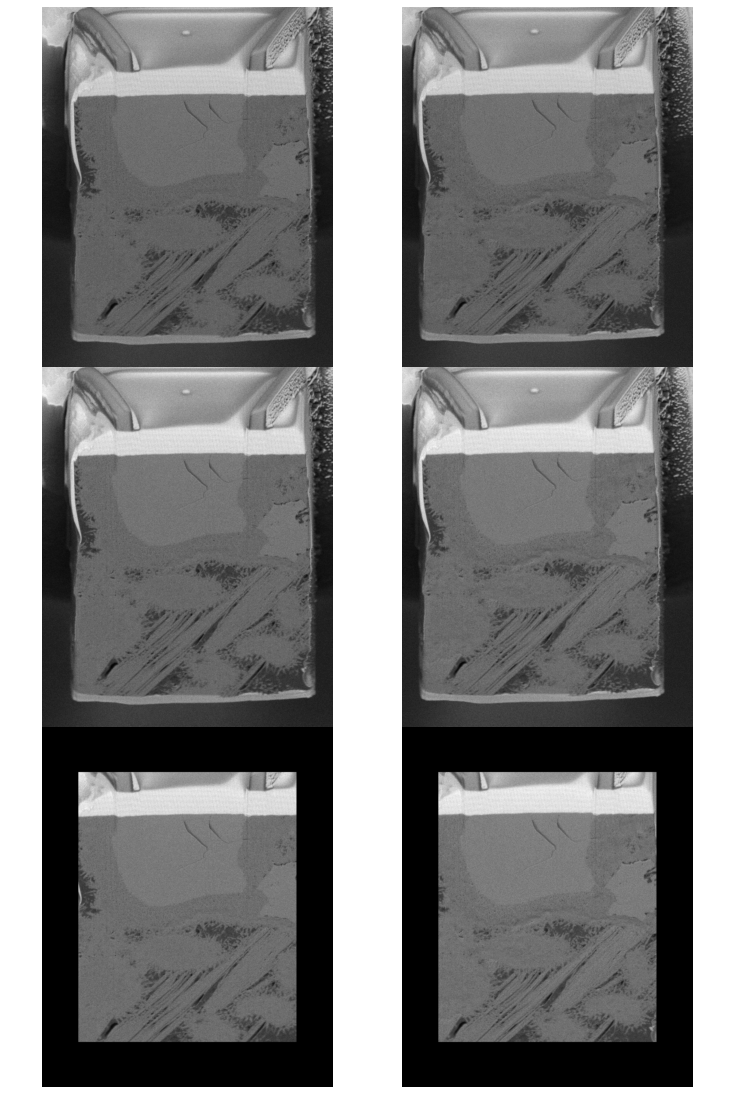

In [8]:
col = 2
row = 3
fig=plt.figure(figsize=(col*5, row*5))
plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, 
            hspace = 0, wspace = 0)
            
plt.margins(0,0)
plt.axis('off')
fig.add_subplot(row, col, 1)
plt.axis('off')
plt.imshow(im_a, cmap='gray')
fig.add_subplot(row, col, 2)
plt.axis('off')
plt.imshow(im_b, cmap='gray')
fig.add_subplot(row, col, 3)
plt.axis('off')
plt.imshow(im_a_denoised, cmap='gray')
fig.add_subplot(row, col, 4)
plt.axis('off')
plt.imshow(im_b_denoised, cmap='gray')
fig.add_subplot(row, col, 5)
plt.axis('off')
plt.imshow(masked_im_a, cmap='gray')
fig.add_subplot(row, col, 6)
plt.axis('off')
plt.imshow(masked_im_b, cmap='gray')

In [9]:
# Registered image will be resotred in imReg. 
# The estimated homography will be stored in h. 
print(im_b_denoised.shape)
imReg, h = alignImages(im_b_denoised, im_a_denoised, mask=mask)
print(imReg.shape)


 0000011AB530FC50>, <DMatch 0000011AB530FC70>, <DMatch 0000011AB530FC90>, <DMatch 0000011AB530FCB0>, <DMatch 0000011AB530FCD0>, <DMatch 0000011AB530FCF0>, <DMatch 0000011AB530FD10>, <DMatch 0000011AB530FD30>, <DMatch 0000011AB530FD50>, <DMatch 0000011AB530FD70>, <DMatch 0000011AB530FD90>, <DMatch 0000011AB530FDB0>, <DMatch 0000011AB530FDD0>, <DMatch 0000011AB530FDF0>, <DMatch 0000011AB530FE10>, <DMatch 0000011AB530FE30>, <DMatch 0000011AB530FE50>, <DMatch 0000011AB530FE70>, <DMatch 0000011AB530FE90>, <DMatch 0000011AB530FEB0>, <DMatch 0000011AB530FED0>, <DMatch 0000011AB530FEF0>, <DMatch 0000011AB530FF10>, <DMatch 0000011AB530FF30>, <DMatch 0000011AB530FF50>, <DMatch 0000011AB530FF70>, <DMatch 0000011AB530FF90>, <DMatch 0000011AB530FFB0>, <DMatch 0000011AB530FFD0>, <DMatch 0000011AB5310030>, <DMatch 0000011AB5310050>, <DMatch 0000011AB5310070>, <DMatch 0000011AB5310090>, <DMatch 0000011AB53100B0>, <DMatch 0000011AB53100D0>, <DMatch 0000011AB53100F0>, <DMatch 0000011AB5310110>, <DMatch 

error: OpenCV(4.4.0) C:\Users\appveyor\AppData\Local\Temp\1\pip-req-build-9d_dfo3_\opencv\modules\imgproc\src\imgwarp.cpp:3167: error: (-215:Assertion failed) (M0.type() == CV_32F || M0.type() == CV_64F) && M0.rows == 3 && M0.cols == 3 in function 'cv::warpPerspective'


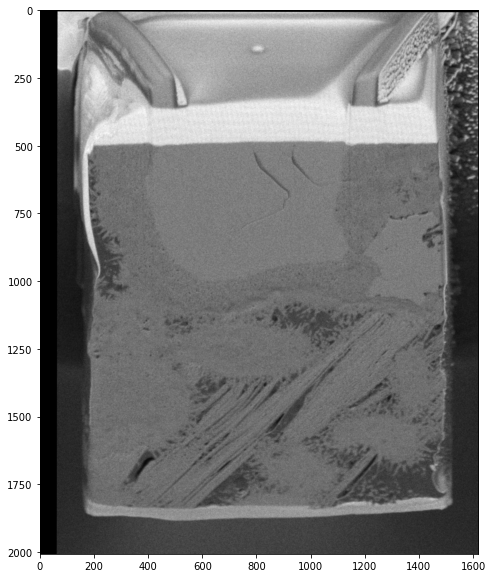

In [10]:
fig=plt.figure(figsize=(10, 10))
plt.imshow(imReg, cmap='gray')

In [11]:

t_x = h[0,2]
t_y = h[1,2]
# only extract x and y movement
# https://stackoverflow.com/questions/25658443/calculating-scale-rotation-and-translation-from-homography-matrix
h_new=np.array([[1,0,t_x],[0,1,t_y],[0,0,1]])
print(math.ceil(t_x),math.ceil(t_y))
# Use homography
height, width = im_b_denoised.shape
im1Reg = cv2.warpPerspective(im_b_denoised, h_new, (math.ceil(width+t_x), math.ceil(height+t_y)))
print(im1Reg.shape)

65 6
(2013, 1683)


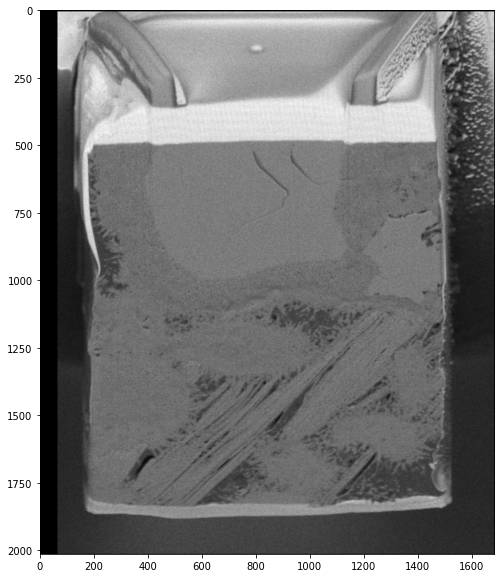

In [12]:
fig=plt.figure(figsize=(10, 10))
plt.imshow(im1Reg, cmap='gray')

In [13]:
immatches = cv2.imread('matches.tif', cv2.IMREAD_COLOR)
fig=plt.figure(figsize=(10 , 5))
plt.imshow(immatches)

TypeError: Image data of dtype object cannot be converted to float

In [13]:
# Write aligned image to disk. 
outFilename = "aligned.tif"
print("Saving aligned image : ", outFilename); 
cv2.imwrite(outFilename, imReg)

Saving aligned image :  aligned.tif


True